<a href="https://colab.research.google.com/github/FuriouStyles/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
sns.__version__

'0.9.0'

### 1. Replicate the Lesson Code

I followed along with the instructor during this lecture, so I will just type what I typed in my lecture [notes](https://colab.research.google.com/drive/14ieqZTz9OMAW3NfvNZf1x2QfJRPI0ORI) as my response to this first requirement.

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [0]:
df = pd.merge(income, lifespan, on=['geo', 'time'], how='inner')
df = pd.merge(df, population)
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [0]:
cols = ['country', 'name', 'world_4region', 'world_6region']
merged = pd.merge(df, entities[cols], left_on='geo', right_on='country').drop(columns='geo')

In [0]:
mapping_1 = {
    'time': 'year',
    'country': 'country_code',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'population_total': 'population',
    'world_4region': '4region',
    'world_6region': '6region',
    'life_expectancy_years': 'lifespan'
}
mapping_2 = {'name': 'country'}
merged = merged.rename(columns=mapping_1)
merged = merged.rename(columns=mapping_2)
merged.head()

,year,income,lifespan,population,country_code,country,4region,6region
0,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [0]:
now = merged[merged['year'] == 2018]
now.head()

,year,income,lifespan,population,country_code,country,4region,6region
218,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,2018,18942,76.97,44688864,arg,Argentina,americas,america


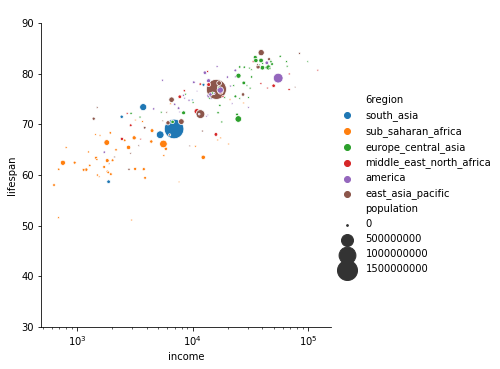

In [0]:
sns.relplot(x='income',
           y='lifespan',
           hue='6region',
           size='population',
           sizes=(3, 400),
           data=now);
plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018', color='white');

In [0]:
np.corrcoef(now['lifespan'], now['income'])

array([[1.        , 0.67035369],
       [0.67035369, 1.        ]])

In [0]:
df_1990 = merged[merged['year'] == 1990]
np.corrcoef(df_1990['lifespan'], df_1990['income'])[0][1]

0.5665901206189361

In [0]:
years = range(1900, 2019)
corr_list = []

for year in years:
  df_year = merged[merged['year'] == year]
  corr = np.corrcoef(df_year['lifespan'], df_year['income'])[0][1]
  corr_list.append(corr)
  
corr_arr = np.array(corr_list)

In [0]:
year_arr = np.array(years)

In [0]:
np.argmax(corr_arr)

34

In [0]:
year_arr[34]

1934

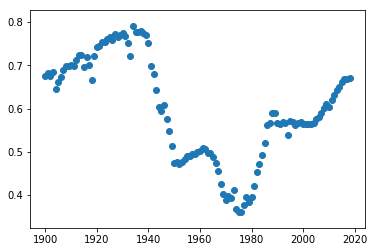

In [0]:
plt.scatter(year_arr, corr_arr);

In [0]:
now_qatar = now[now['country'] == 'Qatar']

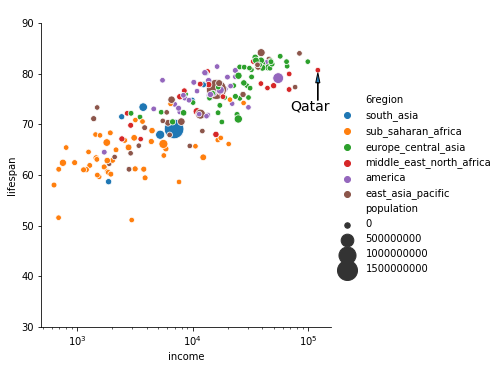

In [0]:
sns.relplot(x='income',
            y='lifespan',
            hue='6region',
            size='population',
            sizes=(30, 400),
            data=now,
            )

plt.xscale('log')
plt.ylim([30, 90])
plt.title('The World in 2018', color='white')
plt.text(x=now_qatar['income'].values[0]-51000,
        y=now_qatar['lifespan'].values[0]-8,
        s='Qatar',
        size=14)
plt.arrow(x=now_qatar['income'].values[0],
         y=now_qatar['lifespan'].values[0]-6,
         dx=0,
         dy=3.5,
         shape='full',
         head_width=10000,
         head_length=2);

In [0]:
px.scatter(merged,
          x='income',
          y='lifespan',
          size='population',
          size_max=55,
          animation_frame='year',
          color='6region',
          log_x=True,
          hover_name='country',
          range_y=[20,90])

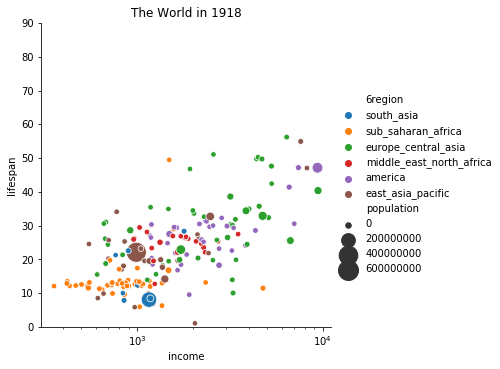

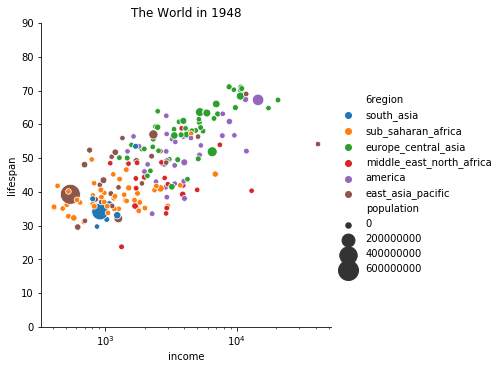

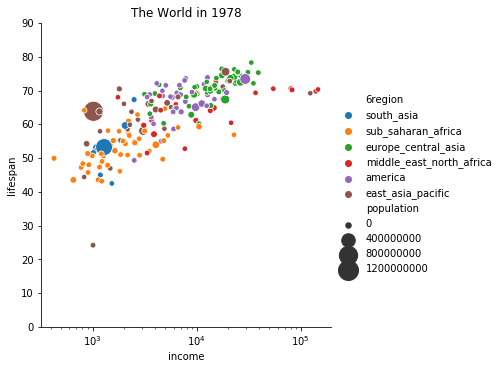

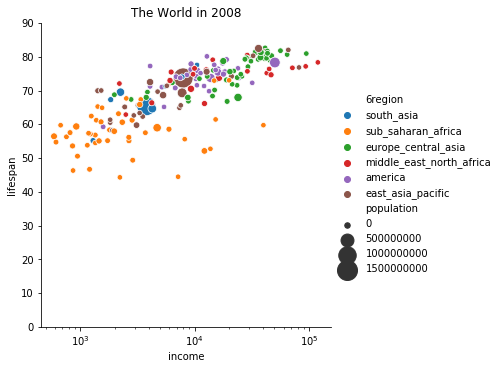

In [137]:
years = [1918, 1948, 1978, 2008]

for year in years:
  df_year = merged[merged['year'] == year]
  sns.relplot(x='income',
            y='lifespan',
            hue='6region',
            size='population',
            sizes=(30, 400),
            data=df_year,
            )
  plt.xscale('log')
  plt.ylim([0, 90])
  plt.title(f'The World in {year}')

### 2. Sequence of Visualizations Combined to Tell a Story

I'm going to try and sequence the periods around WW1, WW2, the Great Depression, and the Great Recession to juxtapose the impact of global war versus global economic chaos.

#### World War 1

In [0]:
years1 = range(1914, 1918, 1)
years2 = range(1939, 1945, 1)
years3 = range(1929, 1939, 1)
years4 = range(2007, 2010, 1)

def get_viz(years):
  for year in years:
    df_year = merged[merged['year'] == year]
    sns.relplot(x='income',
            y='lifespan',
            hue='6region',
            size='population',
            sizes=(30, 400),
            data=df_year,
            )
    plt.xscale('log')
    plt.ylim([0, 90])
    plt.title(f'The World in {year}')

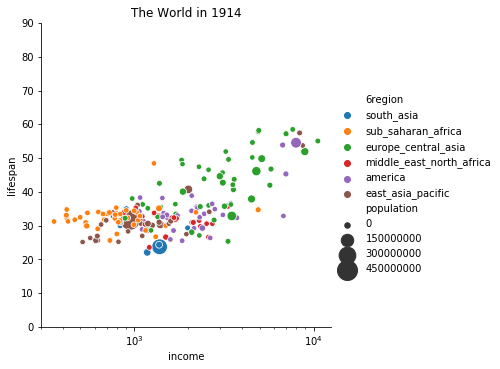

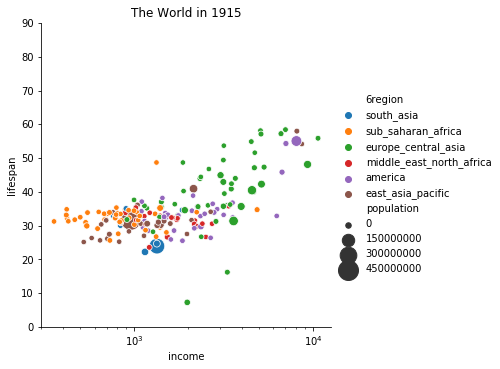

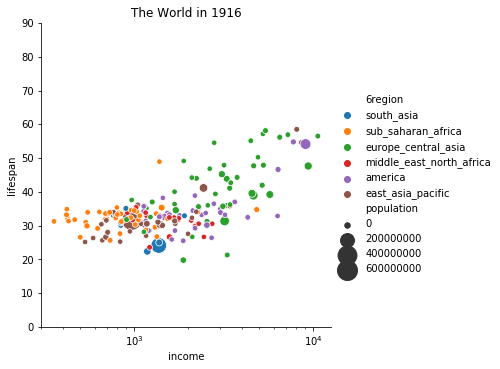

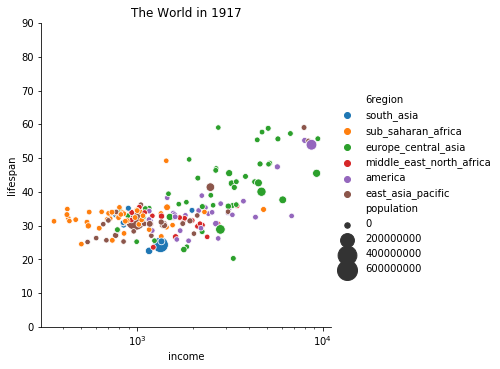

In [139]:
get_viz(years1)

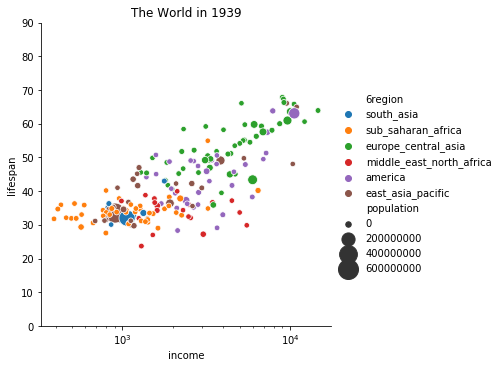

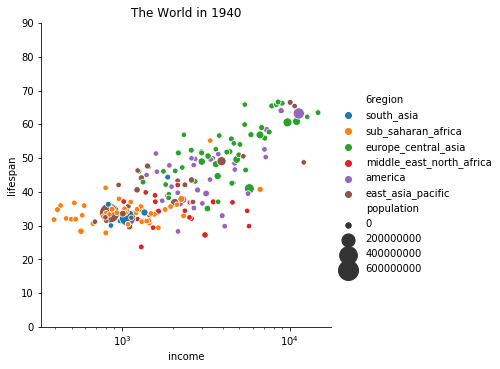

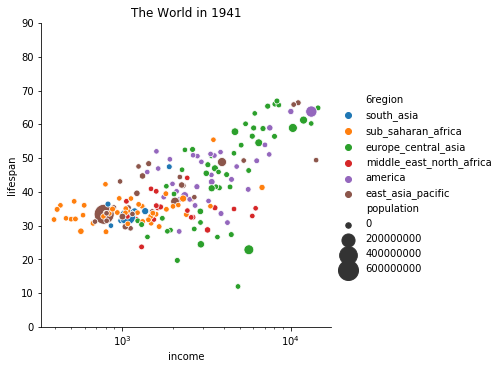

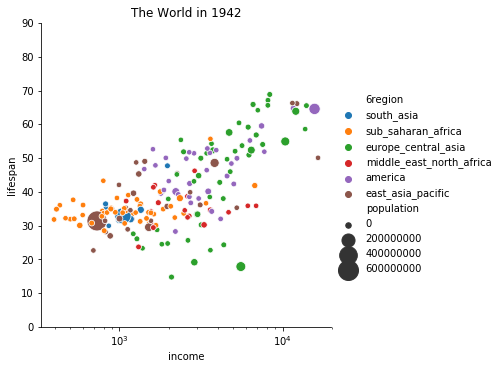

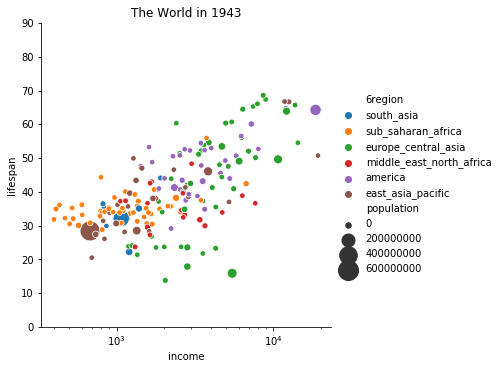

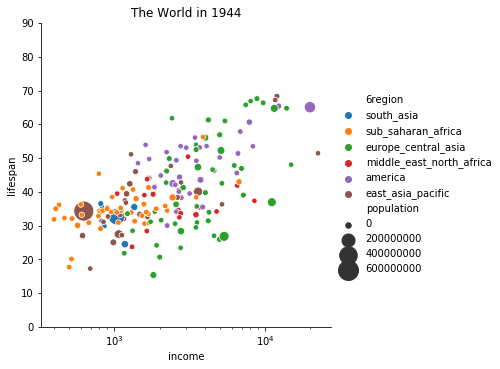

In [140]:
get_viz(years2)

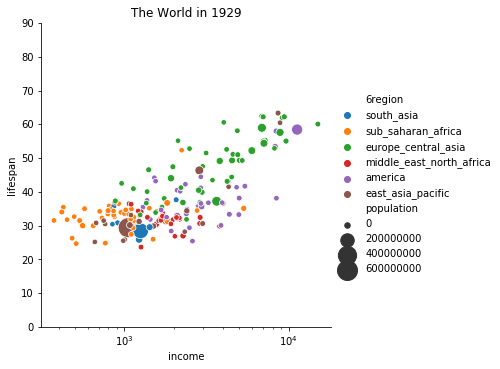

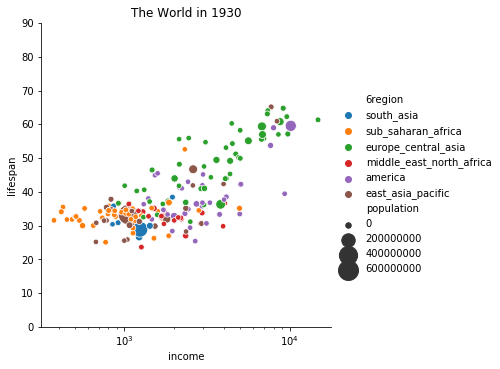

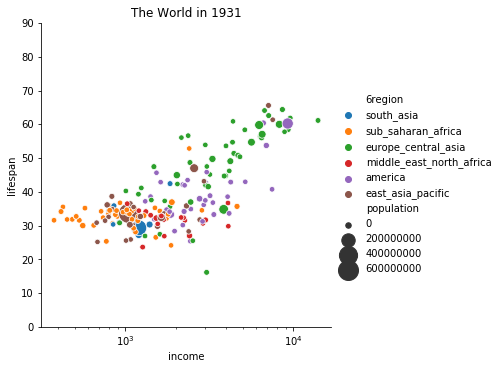

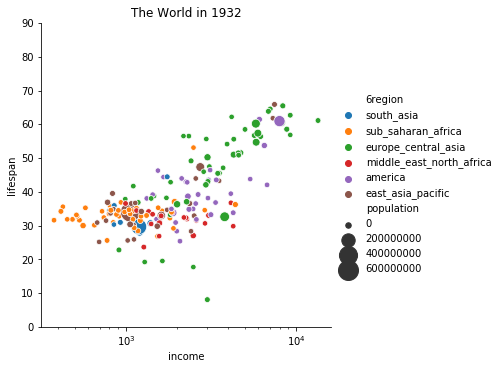

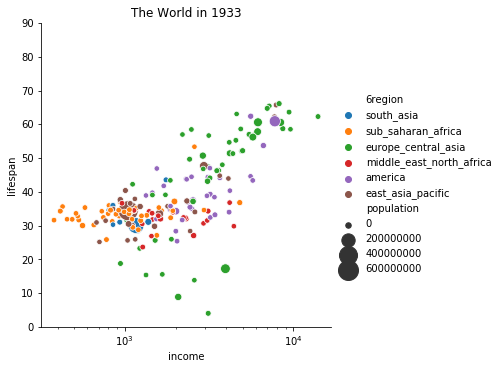

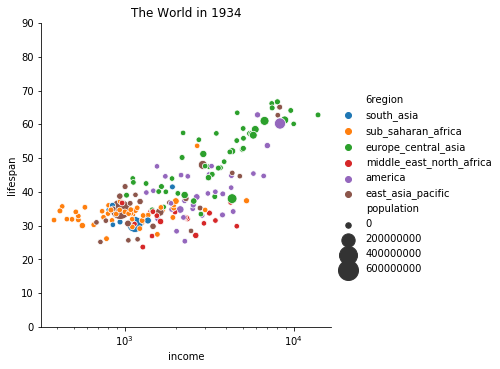

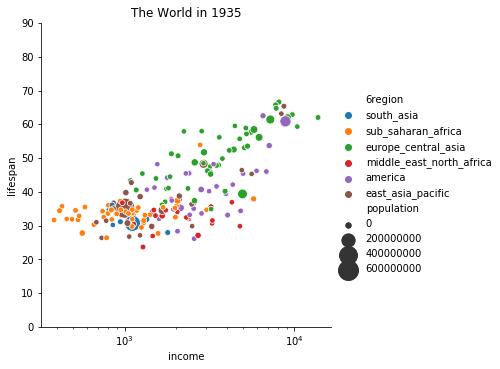

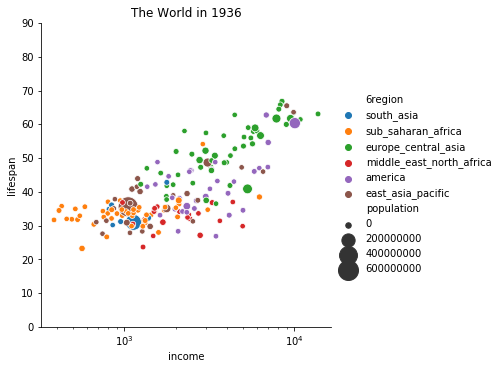

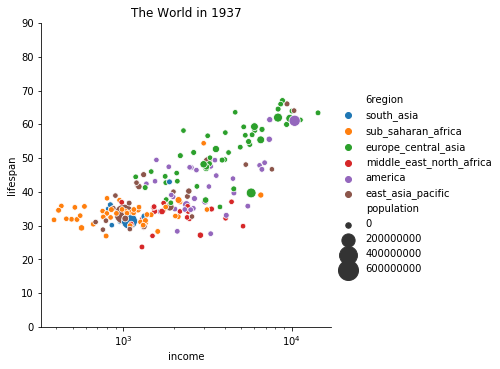

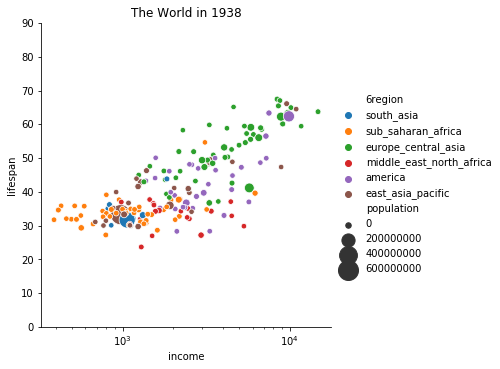

In [141]:
get_viz(years3)

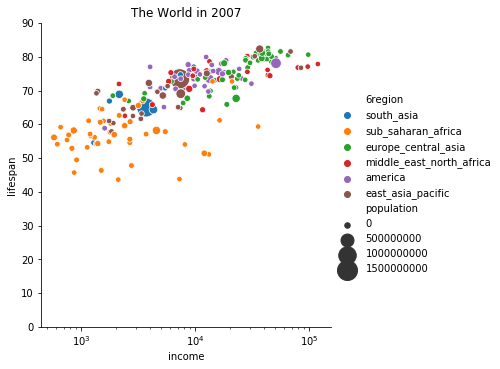

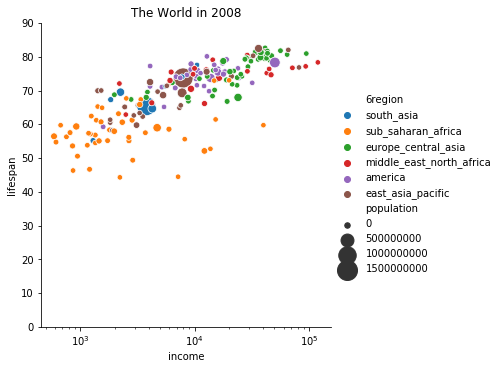

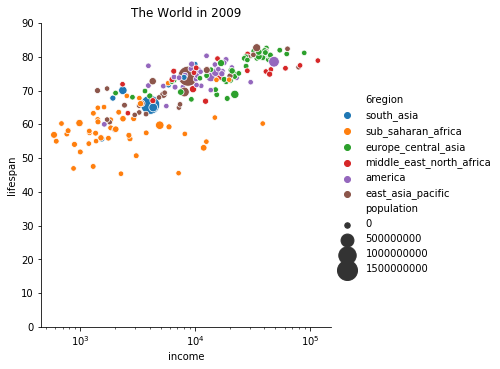

In [142]:
get_viz(years4)

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO